In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

In [2]:
# Import data
heroes_attributes_df = pd.read_csv('heroes_attributes')

In [3]:
heroes_attributes_df

,Unnamed: 0,name,link,BaseStrength,BaseAgility,BaseInteligence,GainStrength,GainAgility,GainInteligence,attack_time,...,Nuker,Disabler,Jungler,Durable,Escape,Pusher,Initiator,Attack_type,damage_start,damage_end
0,0,abaddon,https://www.dota2.com/hero/abaddon,22.0,23.0,18.0,2.6,1.5,2.0,1.7,...,0.0,0.0,0.0,66.6,0.0,0.0,0.0,0,50,60
1,1,alchemist,https://www.dota2.com/hero/alchemist,23.0,22.0,25.0,2.7,1.5,1.8,1.7,...,33.3,33.3,0.0,66.6,0.0,0.0,33.3,0,50,56
2,2,ancientapparition,https://www.dota2.com/hero/ancientapparition,20.0,20.0,23.0,1.9,2.2,3.4,1.7,...,33.3,33.3,0.0,0.0,0.0,0.0,0.0,1,44,54
3,3,anti-mage,https://www.dota2.com/hero/anti-mage,21.0,24.0,12.0,1.6,2.8,1.8,1.4,...,33.3,0.0,0.0,0.0,99.9,0.0,0.0,0,53,57
4,4,arcwarden,https://www.dota2.com/hero/arcwarden,22.0,20.0,24.0,2.6,3.0,2.6,1.7,...,33.3,0.0,0.0,0.0,99.9,0.0,0.0,1,51,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,118,windranger,https://www.dota2.com/hero/windranger,18.0,17.0,18.0,2.6,1.4,3.6,1.5,...,33.3,33.3,0.0,0.0,33.3,0.0,0.0,1,42,54
119,119,winterwyvern,https://www.dota2.com/hero/winterwyvern,22.0,16.0,26.0,2.5,1.7,3.6,1.7,...,33.3,66.6,0.0,0.0,0.0,0.0,0.0,1,40,47
120,120,witchdoctor,https://www.dota2.com/hero/witchdoctor,18.0,13.0,22.0,2.3,1.4,3.3,1.7,...,66.6,33.3,0.0,0.0,0.0,0.0,0.0,1,51,61
121,121,wraithking,https://www.dota2.com/hero/wraithking,22.0,16.0,18.0,3.0,1.7,1.6,1.7,...,0.0,66.6,0.0,99.9,0.0,0.0,33.3,0,60,62


In [4]:
# Get data to analyze
heroes_name = heroes_attributes_df['name'].to_list()
heroes_attributes = np.array(heroes_attributes_df.drop(columns=['name','link']))
print('Size of input matrix is ' + str(heroes_attributes.shape) + ', type of data is ' + str(heroes_attributes.dtype))

Size of input matrix is (123, 27), type of data is float64


In [5]:
# Get latent size
svd = TruncatedSVD(n_components=27)
svd.fit(heroes_attributes)
n_comps = np.where(svd.explained_variance_ratio_.cumsum()<=0.99)[0][-1]
print('Number of component: ' +  str(n_comps))

Number of component: 6


In [6]:
# Reduce data dimension
svd = TruncatedSVD(n_components=n_comps)

In [7]:
reduced_data = svd.fit_transform(heroes_attributes)
reduced_data.shape

(123, 6)

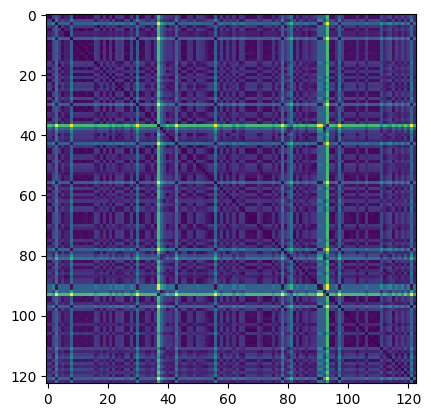

In [8]:
from sklearn.metrics.pairwise import euclidean_distances

# Compute distance between heroes
dist = euclidean_distances(reduced_data)
plt.imshow(dist)

In [9]:
relationship = []

# create graph
for i in range(0,len(heroes_name)):
    for j in range(i+1,len(heroes_name)):
        relationship.append({'hero1': heroes_name[i], 'hero2': heroes_name[j], 'value': dist[i,j]})

# Create pd
relationship_df = pd.DataFrame(relationship)
relationship_df

,hero1,hero2,value
0,abaddon,alchemist,20.304066
1,abaddon,ancientapparition,634.279117
2,abaddon,anti-mage,908.131970
3,abaddon,arcwarden,480.412843
4,abaddon,axe,87.086551
...,...,...,...
7498,winterwyvern,wraithking,764.447823
7499,winterwyvern,zeus,411.577679
7500,witchdoctor,wraithking,1273.740567
7501,witchdoctor,zeus,211.249175


(array([2659., 2966.,  837.,  576.,  184.,   53.,  155.,   53.,    0.,
          20.]),
 array([  12.39449813,  314.29722678,  616.19995543,  918.10268409,
        1220.00541274, 1521.90814139, 1823.81087005, 2125.7135987 ,
        2427.61632735, 2729.51905601, 3031.42178466]),
 <BarContainer object of 10 artists>)

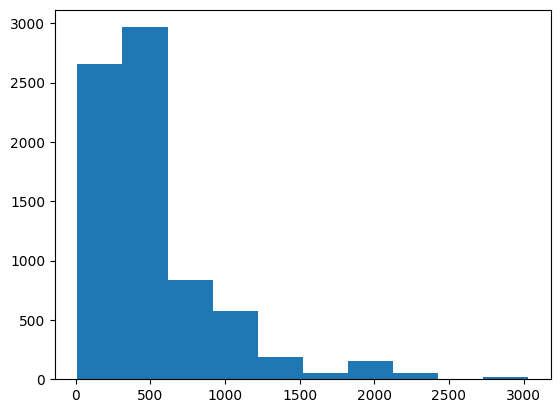

In [10]:
# visualize outlier
plt.hist(relationship_df['value'].to_list())

In [11]:
# remove outlier
relationship_df = relationship_df.drop(index = np.arange(0,len(relationship_df['value']))[relationship_df['value']>=250])

relationship_df['value'] = relationship_df['value'].apply(lambda x: 250/x)

# Graph analysis and visualization #

In [12]:
import networkx as nx

In [13]:
# Create a graph from a pandas datafram
G = nx.from_pandas_edgelist(relationship_df,
                            source='hero1',
                            target='hero2',
                            edge_attr='value',
                            create_using=nx.Graph())

## Graph visualization - networkx - pyvis ##

In [14]:
from pyvis.network import Network

# visualize graph
net = Network(notebook=True, width="1000px", height="700px", bgcolor="#222222", font_color='white')

net.from_nx(G)
net.show("dota_heroes.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [27]:
# get node attribute
degree_dict = nx.degree_centrality(G)

<AxesSubplot: >

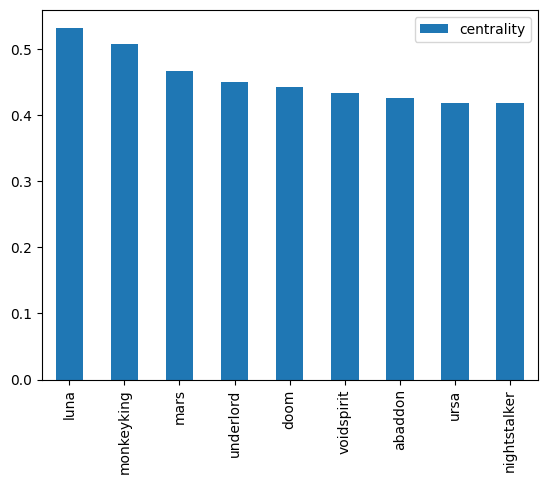

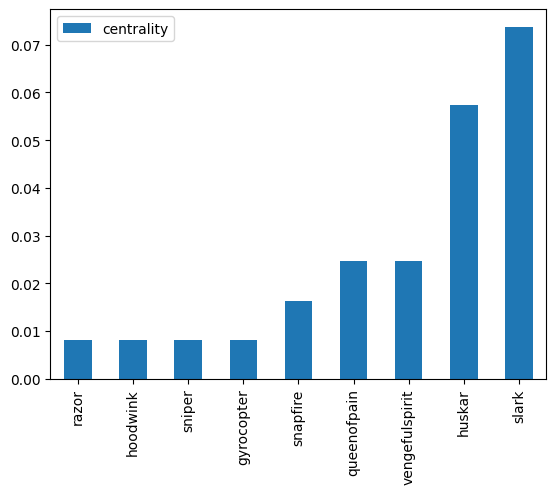

In [49]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind='bar')
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=True)[0:9].plot(kind='bar')

In [50]:
# save centrality measure
nx.set_node_attributes(G, degree_dict, 'degre_centrality')

# Community detection #

In [51]:
import community as community_louvain

In [52]:
communities = community_louvain.best_partition(G)

In [53]:
communities

{'abaddon': 2,
 'alchemist': 2,
 'axe': 2,
 'batrider': 1,
 'bloodseeker': 2,
 'bountyhunter': 2,
 'brewmaster': 2,
 'bristleback': 2,
 'broodmother': 2,
 'centaurwarrunner': 2,
 'chaosknight': 2,
 'clockwerk': 2,
 'darkseer': 2,
 'dawnbreaker': 2,
 'doom': 2,
 'dragonknight': 2,
 'earthspirit': 2,
 'eldertitan': 2,
 'emberspirit': 2,
 'facelessvoid': 2,
 'kunkka': 2,
 'legioncommander': 2,
 'lifestealer': 2,
 'luna': 2,
 'lycan': 2,
 'magnus': 2,
 'mars': 2,
 'meepo': 2,
 'monkeyking': 2,
 'nagasiren': 2,
 'nightstalker': 2,
 'nyxassassin': 2,
 'ogremagi': 2,
 'omniknight': 2,
 'pangolier': 2,
 'phantomassassin': 2,
 'phantomlancer': 2,
 'primalbeast': 2,
 'riki': 2,
 'sandking': 2,
 'spectre': 2,
 'spiritbreaker': 2,
 'templarassassin': 2,
 'terrorblade': 2,
 'tidehunter': 2,
 'timbersaw': 2,
 'tiny': 2,
 'treantprotector': 2,
 'tusk': 2,
 'underlord': 2,
 'undying': 2,
 'ursa': 2,
 'voidspirit': 2,
 'ancientapparition': 0,
 'chen': 0,
 'darkwillow': 0,
 'dazzle': 0,
 'disruptor': 0,

In [54]:
nx.set_node_attributes(G, communities, 'group')

In [55]:
# visualize graph
com_net = Network(notebook=True, width="1000px", height="700px", bgcolor="#222222", font_color='white')

com_net.from_nx(G)
com_net.show("dota_heroes_com.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
